# MIKE21 HD

In [1]:
import modelskill as ms

In [2]:
mr = ms.model_result('../tests/testdata/Oresund2D.dfsu',
                     item='Surface elevation')
mr

<DfsuModelResult>: Oresund2D
Time: 2018-03-04 00:00:00 - 2018-03-10 22:40:00
Quantity: Surface Elevation [m]

In [3]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = ms.PointObservation(fn, x=366844.15, y=6154291.6, item=0) 
o1

<PointObservation>: smhi_2095_klagshamn
Location: 366844.15, 6154291.6
Time: 2015-01-01 01:00:00 - 2020-09-28 00:00:00
Quantity: Water Level [m]

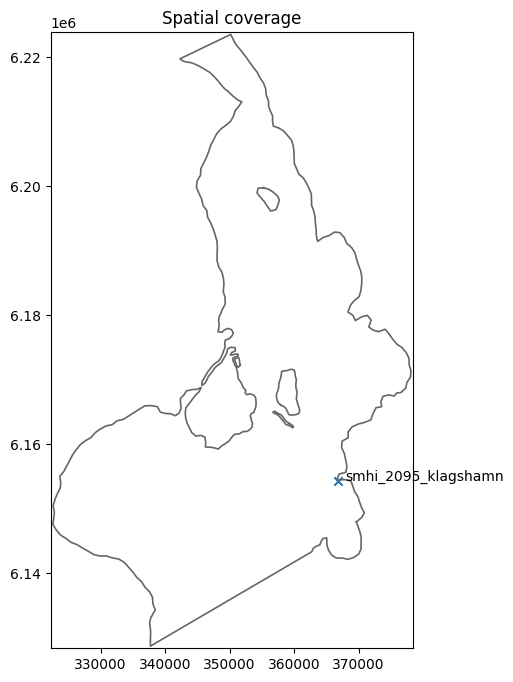

In [4]:
ms.plotting.spatial_overview(o1, mr, figsize=(8, 8));

In [5]:
cmp = ms.match(o1, mr)
cmp

<Comparer>
Quantity: Water Level [m]
Observation: smhi_2095_klagshamn, n_points=167
Model(s):
0: Oresund2D

Most use cases will compare many observed locations to a one or more models.

In this case we only have one observed location.

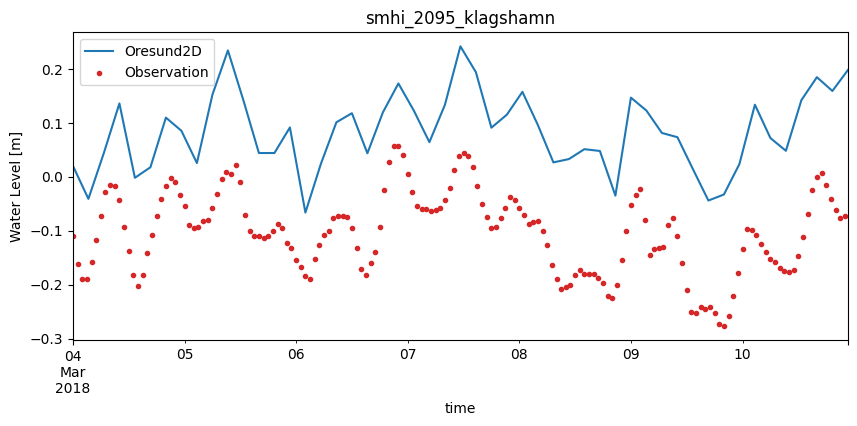

In [6]:
cmp.plot.timeseries(figsize=(10,4));

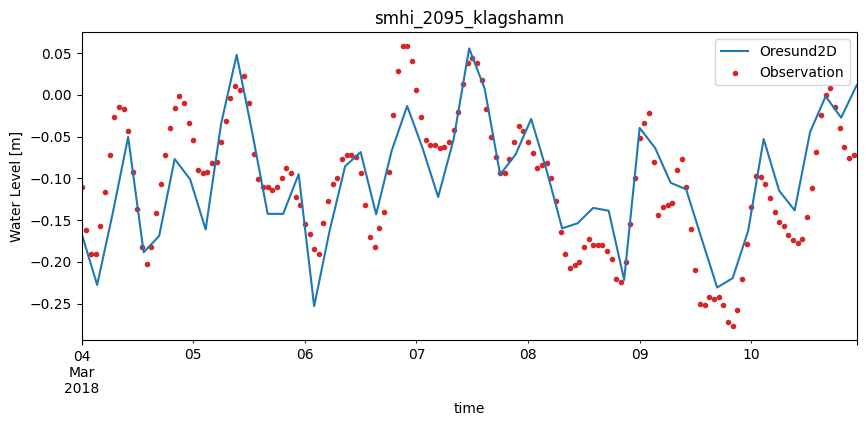

In [7]:
ub_cmp = cmp.remove_bias()
ub_cmp.plot.timeseries(figsize=(10,4));

In [8]:
ub_cmp.score("bias")

{'Oresund2D': -2.9251385079944247e-17}

In [9]:
cmp.score("bias")

{'Oresund2D': 0.1868744370781926}

<Axes: title={'center': 'smhi_2095_klagshamn'}, xlabel='time', ylabel='Water Level [m]'>

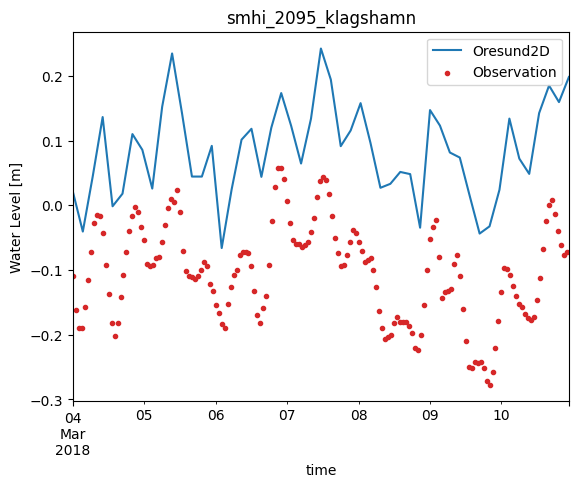

In [10]:
cmp.plot.timeseries()

Get skill for a commonly used set of metrics

In [11]:
cmp.skill()

n      bias      rmse     urmse       mae        cc  \
observation                                                                  
smhi_2095_klagshamn  167  0.186874  0.191303  0.040924  0.186874  0.838306   

                           si        r2  
observation                              
smhi_2095_klagshamn  0.378995 -5.505521

Or choose specific metrics

In [12]:
cmp.skill(metrics = ["bias","rmse"])

n      bias      rmse
observation                                 
smhi_2095_klagshamn  167  0.186874  0.191303

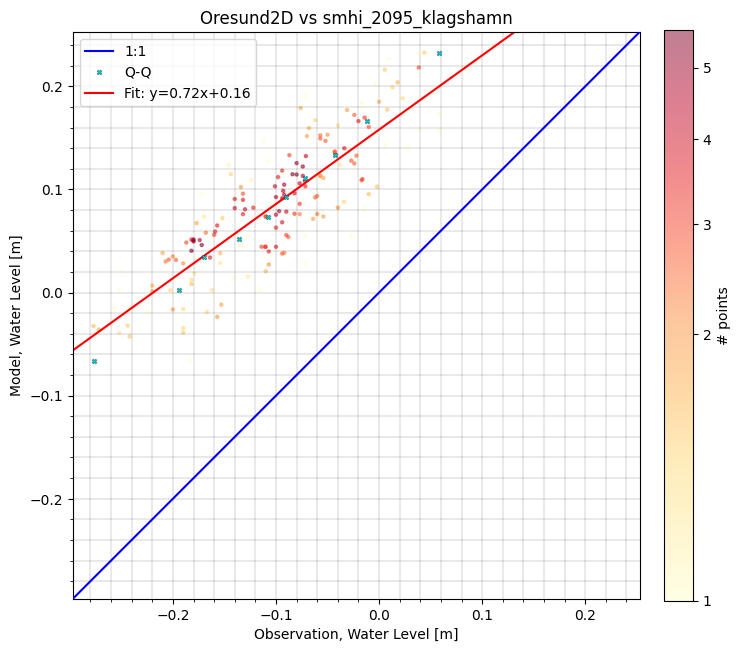

In [13]:
cmp.plot.scatter(bins=0.02, cmap='YlOrRd', show_points=True);

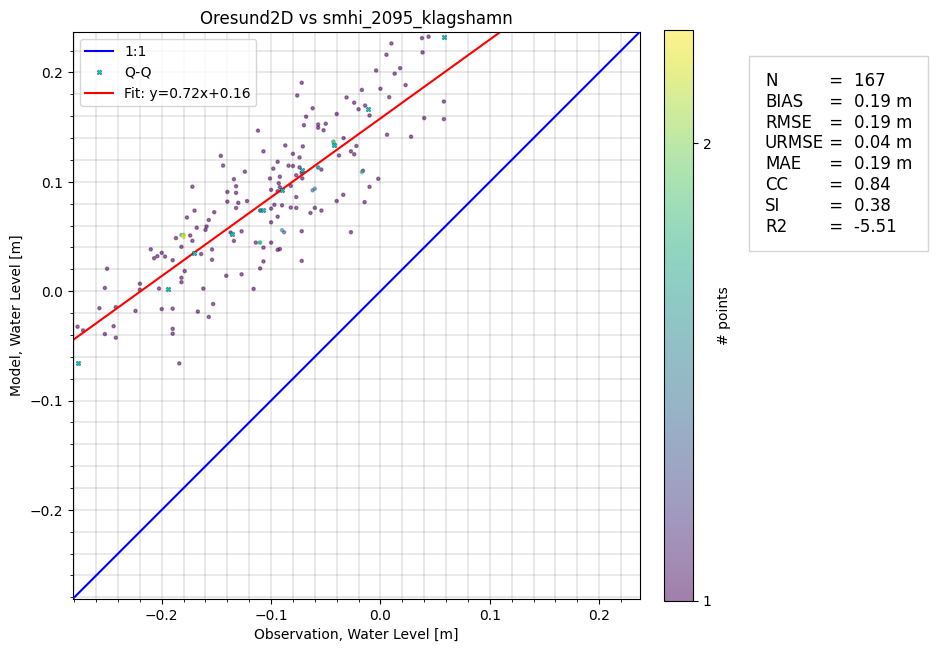

In [14]:
cmp.plot.scatter(skill_table=True, show_points=True);